In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.

In [3]:
df = pd.read_csv('/Users/angelique/Documents/GitHub/Story_Telling_Case_study/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
# Count NaN values in each column
nan_count = df.isna().sum()

# Display the count of NaNs per column
print(nan_count)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [7]:
# Check which columns contain "?"
columns_with_question_mark = (df == '?').any()

# Display columns that contain "?"
columns_with_question_mark = columns_with_question_mark[columns_with_question_mark].index.tolist()

print(columns_with_question_mark)  # List of columns that contain "?"

['workclass', 'occupation', 'native-country']


In [9]:
# Replace 'unknown' and 'nan' (as string) with actual NaN values
df['workclass'] = df['workclass'].replace(['?'], np.nan)
df['occupation'] = df['occupation'].replace(['?'], np.nan)
df['native-country'] = df['native-country'].replace(['?'], np.nan)

# Count NaN values in each column
nan_count = df.isna().sum()

# Display the count of NaNs per column
print(nan_count)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


In [11]:
df.shape

(48842, 15)

In [13]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [15]:
df['education'] = df['education'].replace(['11th', '10th', '12th', '9th'], 'Some-HS')
df['education'] = df['education'].replace(['7th-8th'], 'Some-MS')
df['education'] = df['education'].replace(['5th-6th', '1st-4th'], 'Some-Elementary')

In [17]:
df['education'].unique()

array(['Some-HS', 'HS-grad', 'Assoc-acdm', 'Some-college', 'Prof-school',
       'Some-MS', 'Bachelors', 'Masters', 'Doctorate', 'Some-Elementary',
       'Assoc-voc', 'Preschool'], dtype=object)

In [19]:
df['education'].value_counts()

education
HS-grad            15784
Some-college       10878
Bachelors           8025
Some-HS             4614
Masters             2657
Assoc-voc           2061
Assoc-acdm          1601
Some-MS              955
Prof-school          834
Some-Elementary      756
Doctorate            594
Preschool             83
Name: count, dtype: int64

In [21]:
df['education'] = df['education'].replace(['Some-MS', 'Some-HS', 'Preschool'], 'Not-HS-grad')
df['education'].value_counts()

education
HS-grad            15784
Some-college       10878
Bachelors           8025
Not-HS-grad         5652
Masters             2657
Assoc-voc           2061
Assoc-acdm          1601
Prof-school          834
Some-Elementary      756
Doctorate            594
Name: count, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [25]:
print(df.describe())

                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


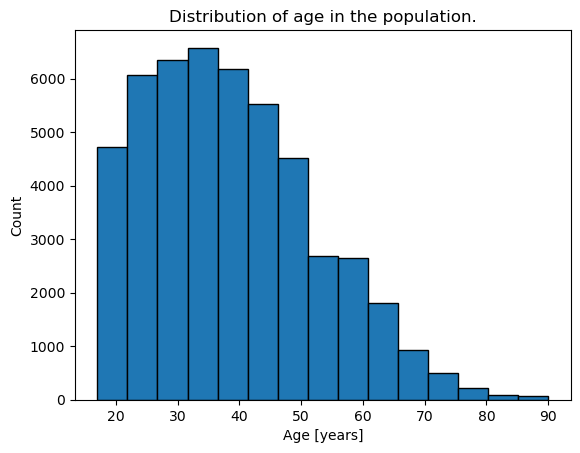

In [27]:
plt.hist(df['age'], edgecolor = 'k', bins = 15)
plt.title('Distribution of age in the population.') 
plt.xlabel('Age [years]')
plt.ylabel('Count')
first_color = ['#E69F00']
sns.set_palette(first_color)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


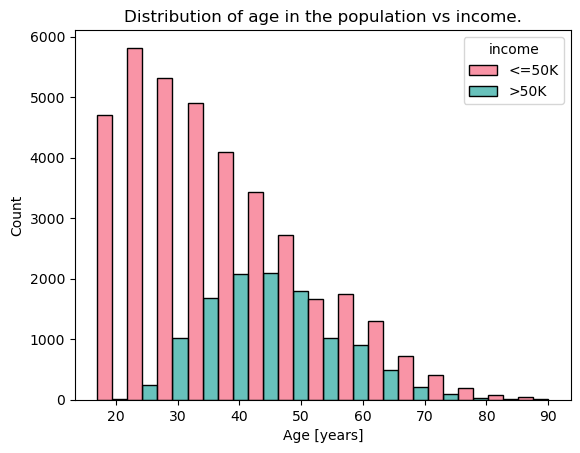

In [29]:
sns.histplot(x='age', hue='income', data=df, bins = 15, multiple='dodge')
plt.title('Distribution of age in the population vs income.') 
plt.xlabel('Age [years]')
plt.ylabel('Count')
first_colors = ['#56B4E9', '#E69F00']
sns.set_palette(first_colors)

You can see in the graph above that people are more likely to reach the income threshold level of greater than 50K once they get to their mid 30's through their mid 50's. Considering the arc of professions and occupations that makes sense for when people earn the most in their fields. 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


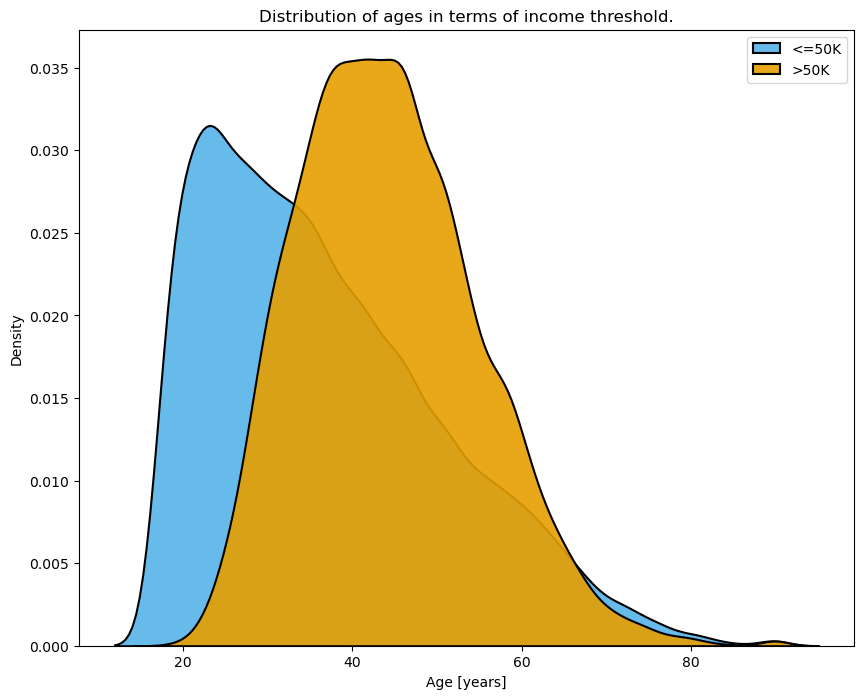

In [32]:
# colors
low_c = '#E69F00'
high_c = '#56B4E9'
plt.figure(figsize = (10, 8))

# KDE plot with `fill` instead of `shade`
sns.kdeplot(df.loc[df['income'] == '<=50K', 'age'], label='<=50K', color=high_c, ec='black', fill=True, linewidth=1.5, alpha=0.9, zorder=3)
sns.kdeplot(df.loc[df['income'] == '>50K', 'age'], label='>50K', color=low_c, ec='black', fill=True, linewidth=1.5, alpha=0.9, zorder=3)

plt.xlabel('Age [years]')
plt.ylabel('Density')
plt.title('Distribution of ages in terms of income threshold.')
plt.legend()

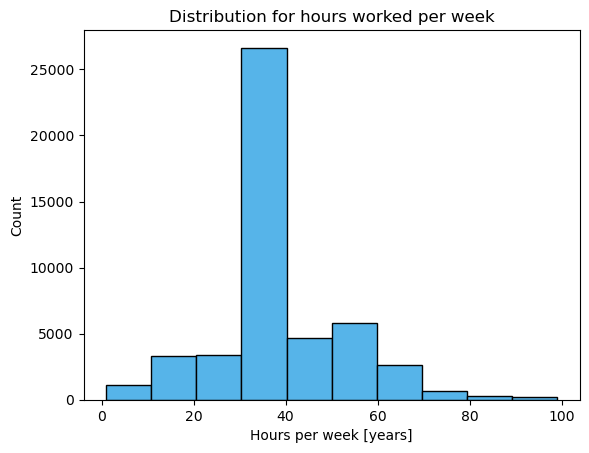

In [34]:
plt.hist(df['hours-per-week'], edgecolor = 'k', bins = 10)
plt.title('Distribution for hours worked per week') 
plt.xlabel('Hours per week [years]')
plt.ylabel('Count')
third_color = ['#009E73']
sns.set_palette(third_color)

You can see from this graph that most people work the typical less than 40 hour work week with about an equal distribution on the higher and lower ends of that spectrum. 

Text(0, 0.5, 'Hours worked per week')

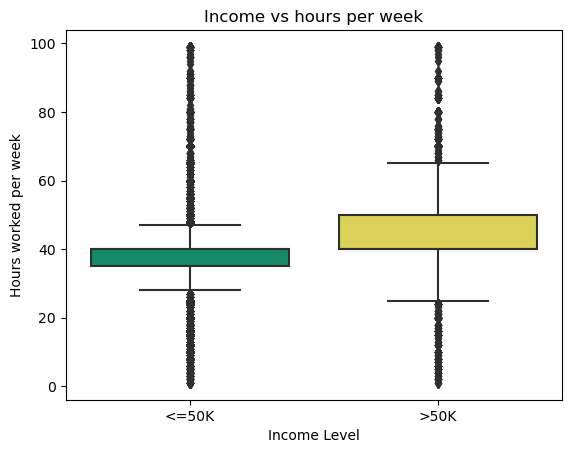

In [37]:
third_colors = ['#009E73', '#F0E442']
sns.set_palette(third_colors)
sns.boxplot(data=df, x='income', y='hours-per-week')
plt.title('Income vs hours per week')
plt.xlabel('Income Level')
plt.ylabel('Hours worked per week')

In a lot of jobs there is overtime for work so if people are working more than 40 hours per week, there should be a difference in income levels with the overtime included.  Looking at the boxplot above though, it shows that there are outliers that work up to 100 hours per week and are still making less than the 50K income and there are people that work less than 20 hours per week that make over 50K in income.

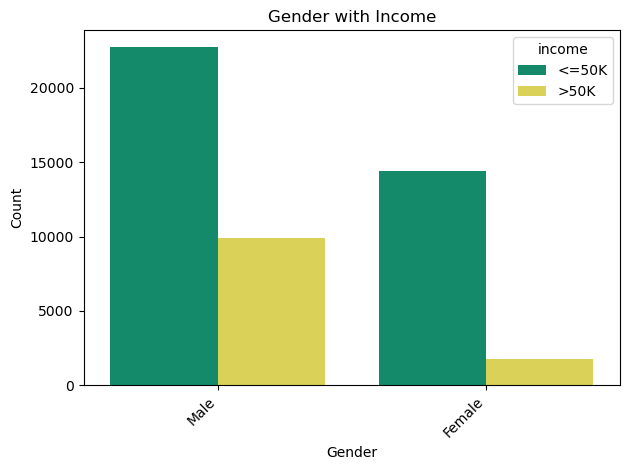

In [40]:
sns.countplot(x='gender', data=df, hue='income', dodge=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender with Income')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

Just looking at this graph shows that just under half of men have an income of 50K or higher, whereas for women, it's less than 20% that have an income of 50K or higher. 

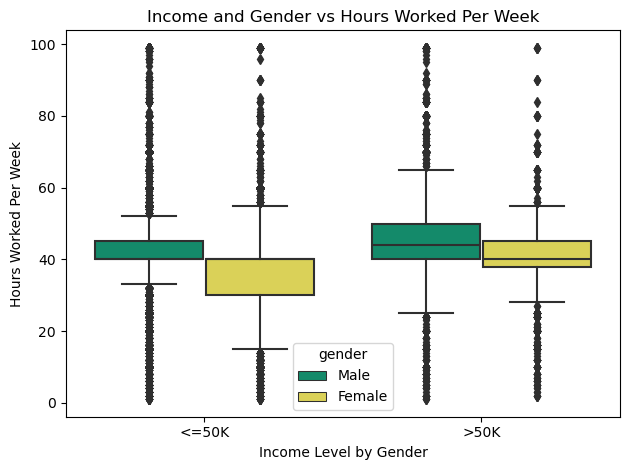

In [43]:
# Filter the relevant columns
hpw_df = df[['hours-per-week', 'income', 'gender']]

# Define the colors
third_colors = ['#009E73', '#F0E442', '#56B4E9', '#E69F00']
sns.set_palette(third_colors)

# Create the boxplot
sns.boxplot(data=hpw_df, x='income', y='hours-per-week', hue='gender')

# Customize the plot
plt.title('Income and Gender vs Hours Worked Per Week')
plt.xlabel('Income Level by Gender')
plt.ylabel('Hours Worked Per Week')

# Show the plot
plt.tight_layout()
plt.show()


You can with the above graph that 75% of women who earned less than 50K worked less than 40 hours whereas about 75% of men that earned less than 50K worked typically between 40-50 hours.  For the women that earned over 50K, 75% of them worked just under 40 hours a week to approximately 55 hours per week. Men that earned over 50K had 25% of them working for as many as 50-70 hours per week.

In [46]:
# Create a binary column to indicate wheather a person earns more than 50K or not
df['50K_threshold'] = df.apply(lambda x: 1 if x['income'] == '>50K' else 0, axis=1)

/var/folders/v8/j1kjtws546j8drwljwyklgrm0000gn/T/ipykernel_74510/2212187022.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = age_df.groupby(['age_group', 'gender'], as_index=False)['50K_threshold'].mean()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or 

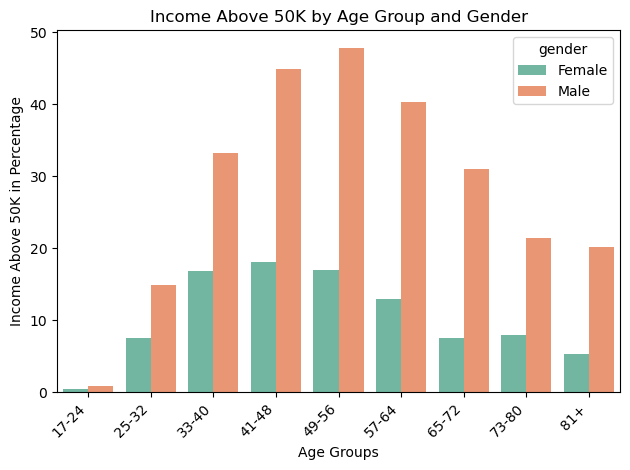

In [73]:
age_bins = [17, 24, 32, 40, 48, 56, 64, 72, 80, 91]  # You can adjust these bin ranges
age_labels = ['17-24', '25-32', '33-40', '41-48', '49-56', '57-64', '65-72', '73-80', '81+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Step 2: Prepare the dataset (use groupby to calculate the percentage)
age_df = df[['age_group', '50K_threshold', 'gender']]
age_groups = age_df.groupby(['age_group', 'gender'], as_index=False)['50K_threshold'].mean()

# Step 3: Plot the barplot
sns.barplot(x='age_group', y=100 * age_groups['50K_threshold'], hue='gender', data=age_groups, palette='Set2')

# Step 4: Customizing the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.xlabel('Age Groups')
plt.ylabel('Income Above 50K in Percentage')
plt.title('Income Above 50K by Age Group and Gender')
plt.tight_layout()  # Adjust layout to fit labels

# Show the plot
plt.show()

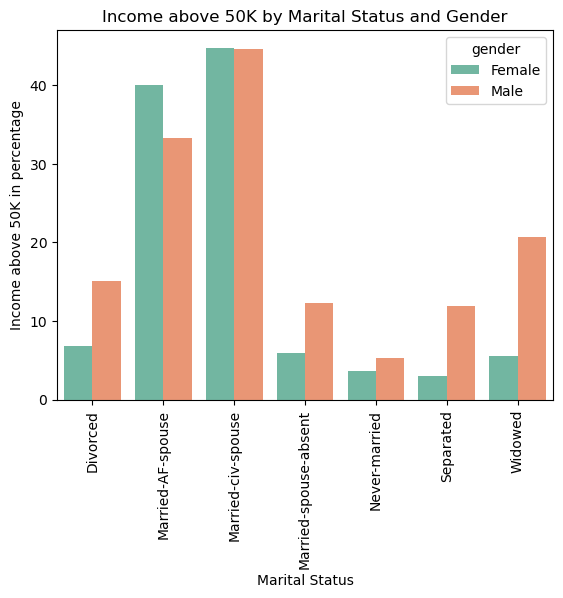

In [48]:
# Prepare the dataset (use groupby to calculate the percentage)
marital_df = df[['marital-status', '50K_threshold', 'gender']]
marital_groups = marital_df.groupby(['marital-status', 'gender'], as_index=False)['50K_threshold'].mean()

# Plot the barplot
sns.barplot(x='marital-status', y=100 * marital_groups['50K_threshold'], hue='gender', data=marital_groups, palette='Set2')

# Customizing the plot
plt.xticks(rotation=90)
plt.xlabel('Marital Status')
plt.ylabel('Income above 50K in percentage')
plt.title('Income above 50K by Marital Status and Gender')
plt.show()

Based on this you can see that women and men have the highest likelihood of reaching the 50K threshold for income if they are either Married while "Absent From Spouse" or married with a "Civilian Spouse". Women in particular have a much higher percentage for the 50K income threshold in these categories, which is definitely a marked difference especially when compared to how few women reach the 50K income threshold in the previous graph.

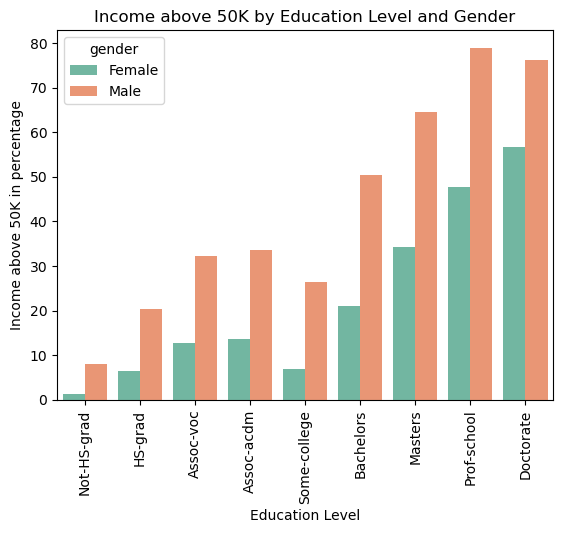

In [51]:
# Prepare the dataset (use groupby to calculate the percentage)
education_df = df[['education', '50K_threshold', 'gender']]
education_groups = education_df.groupby(['education', 'gender'], as_index=False)['50K_threshold'].mean()

# Plot the barplot
order = ['Not-HS-grad', 'HS-grad', 'Assoc-voc', 'Assoc-acdm', 'Some-college', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
sns.barplot(x='education', y=100 * education_groups['50K_threshold'], hue='gender', data=education_groups, order=order, palette='Set2')

# Customizing the plot
plt.xticks(rotation=90)
plt.xlabel('Education Level')
plt.ylabel('Income above 50K in percentage')
plt.title('Income above 50K by Education Level and Gender')
plt.show()

You can see here that both genders have a much higher percentage for making the 50K threshold for income once a masters level education is achieved althought women are still trailing behind men even with similar education levels. 

In [54]:
df['race'].value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

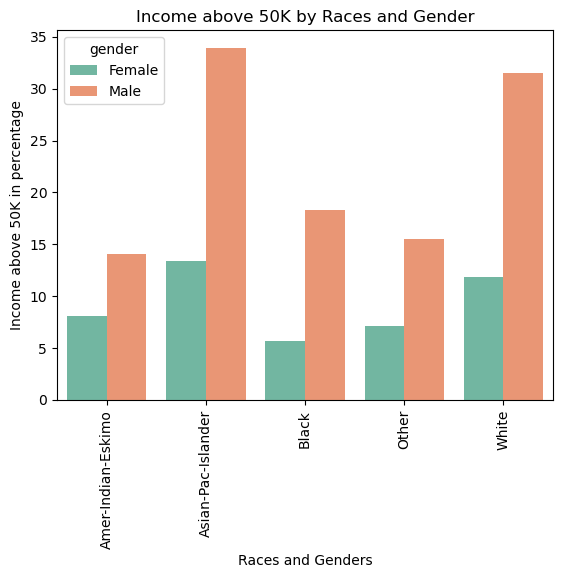

In [56]:
# Prepare the dataset (use groupby to calculate the percentage)
race_g_df = df[['race', '50K_threshold', 'gender']]
race_g_groups = race_g_df.groupby(['race', 'gender'], as_index=False)['50K_threshold'].mean()

# Plot the barplot
sns.barplot(x='race', y=100 * race_g_groups['50K_threshold'], hue='gender', data=race_g_groups, palette='Set2')

# Customizing the plot
plt.xticks(rotation=90)
plt.xlabel('Races and Genders')
plt.ylabel('Income above 50K in percentage')
plt.title('Income above 50K by Races and Gender')
plt.show()

Based on this graph you can see that race and gender plays a role in the percentage of earners that reach above the 50K income threshold. Men that identify as Asian-Pacific Islandars and White are almost twice as likely from the other groups to reach that income level. Women of all races don't have even as high of a percentage for making the above 50K threshold as the lowest percentage group for males (American-Eskimo males).  